In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


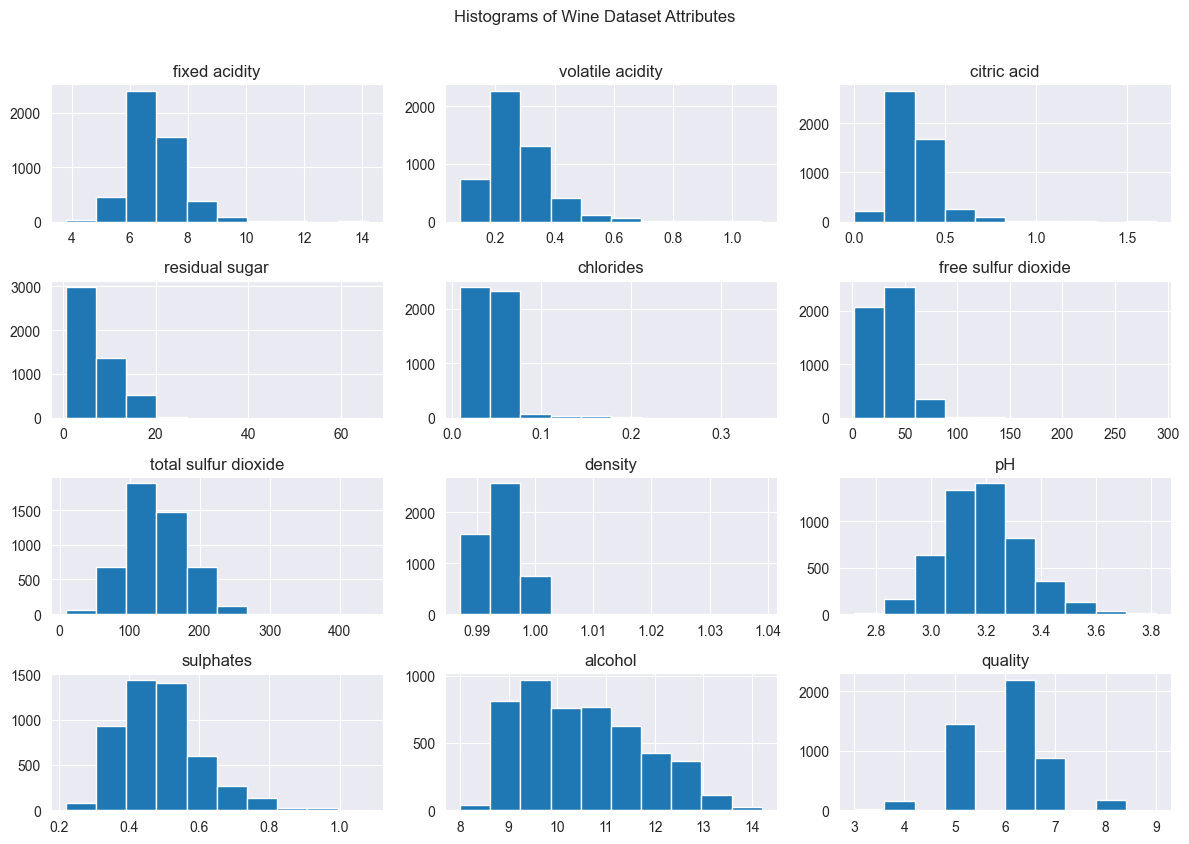

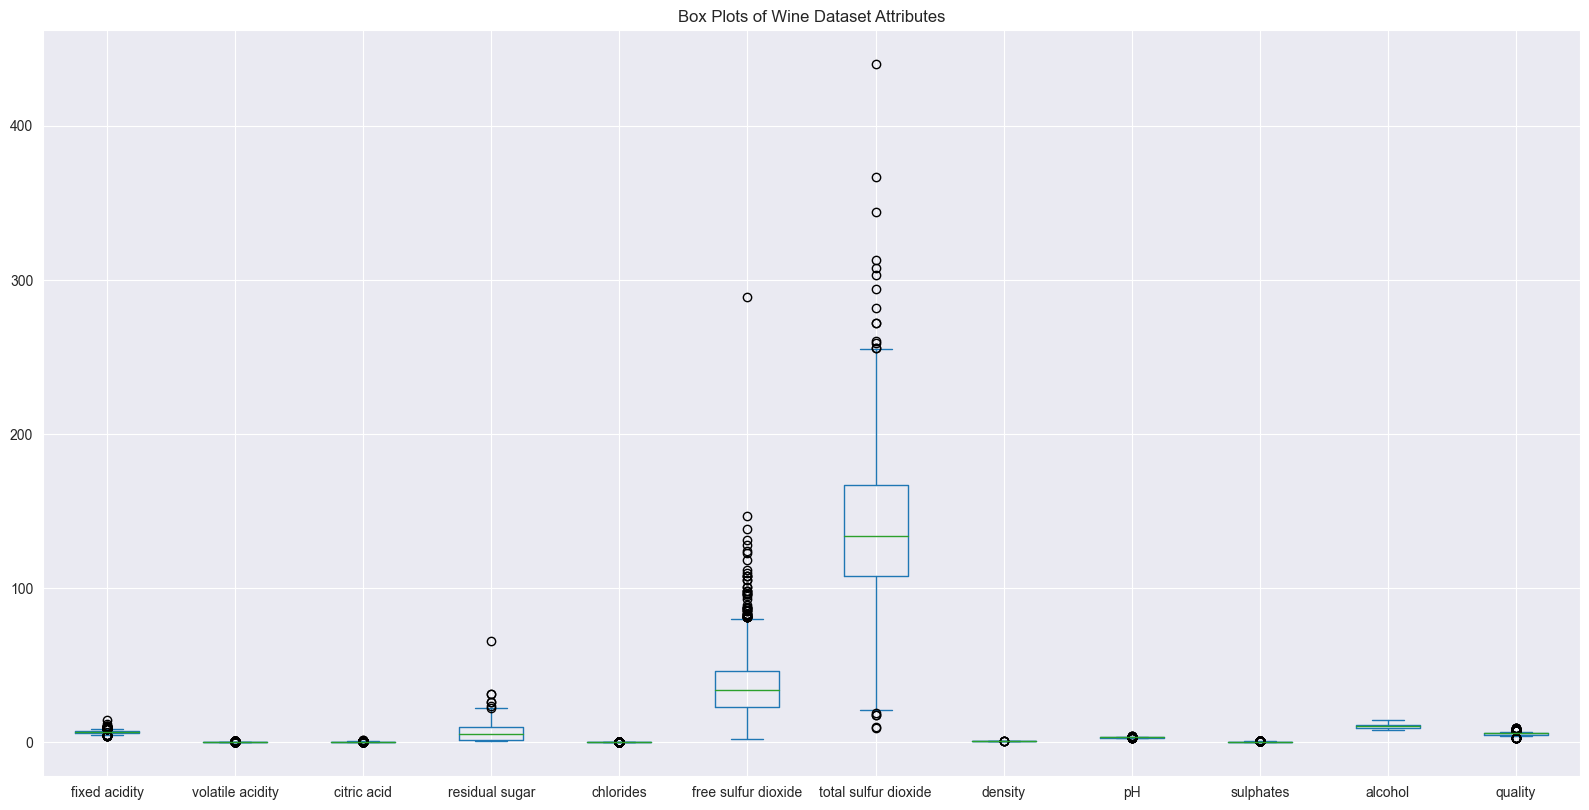

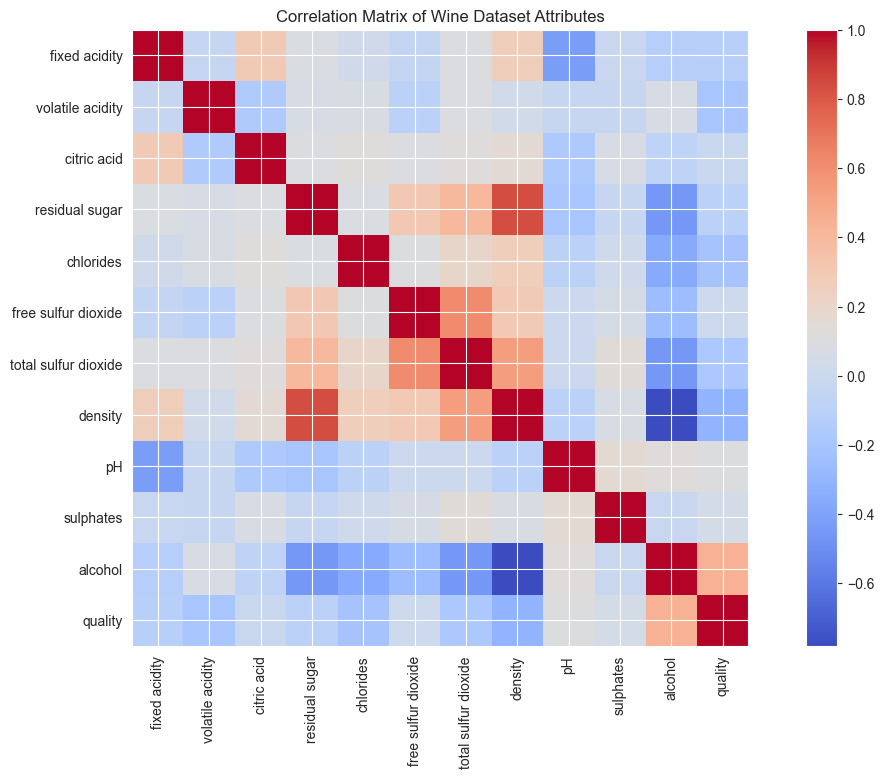

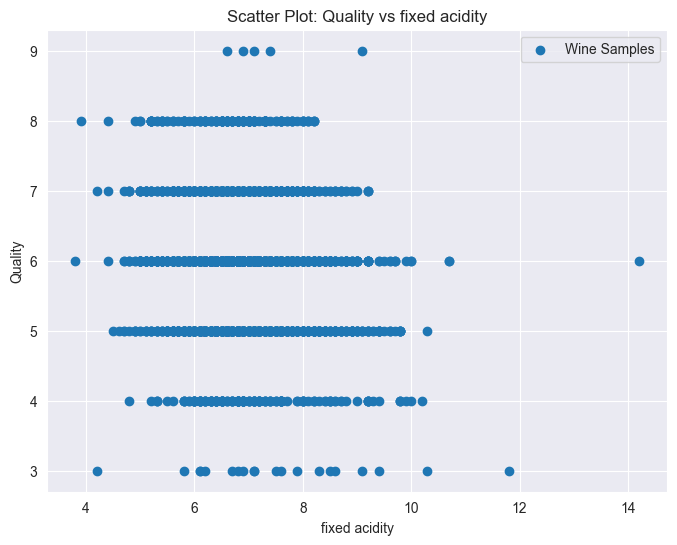

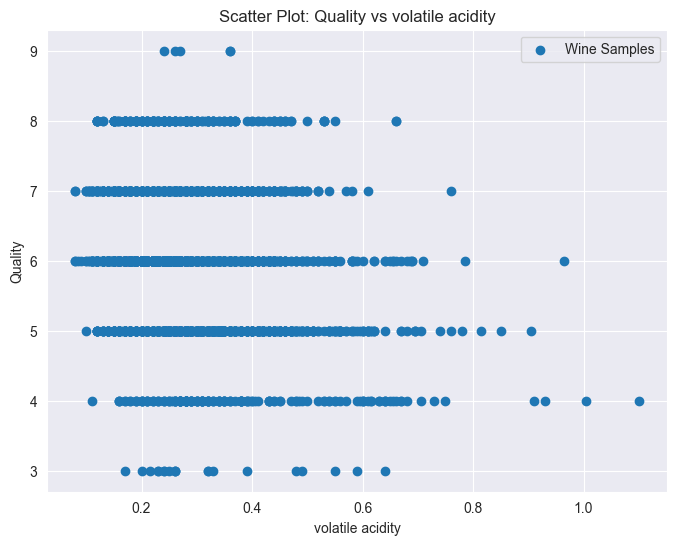

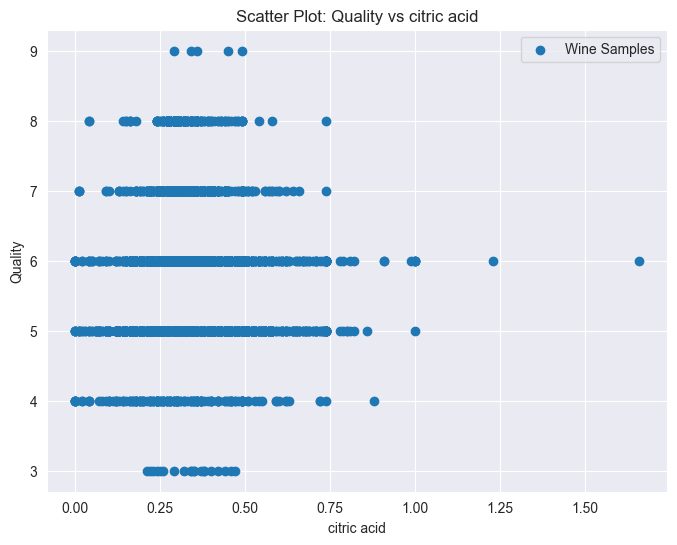

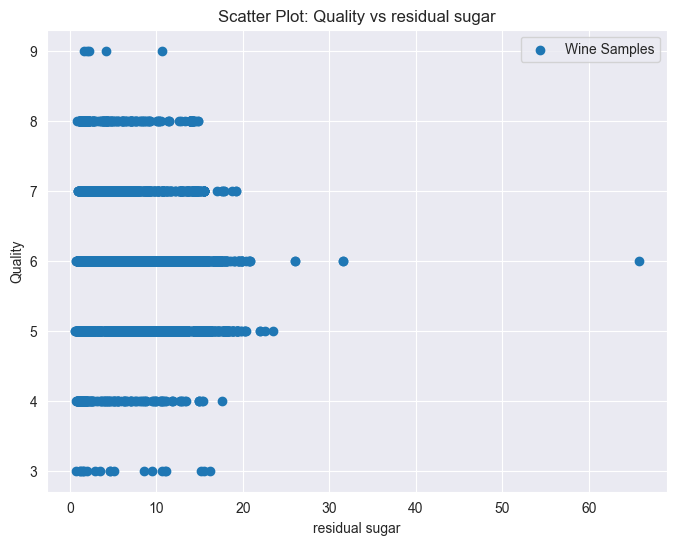

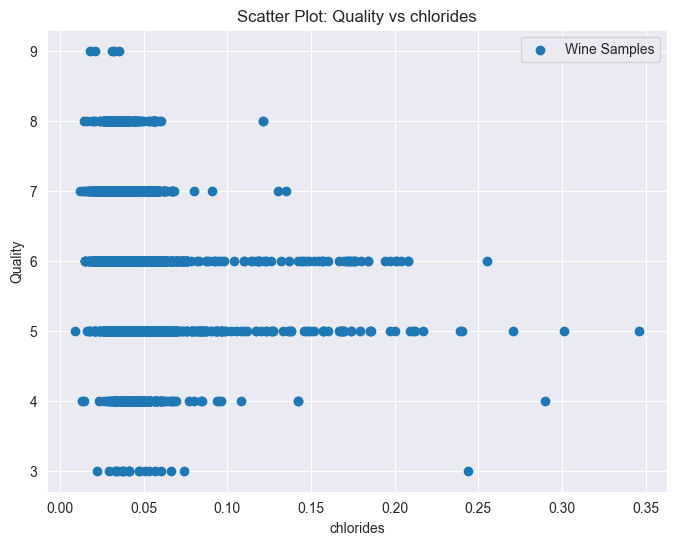

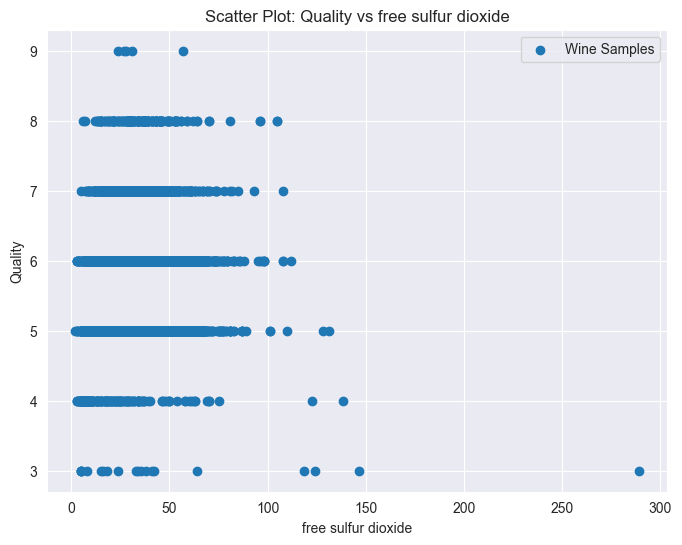

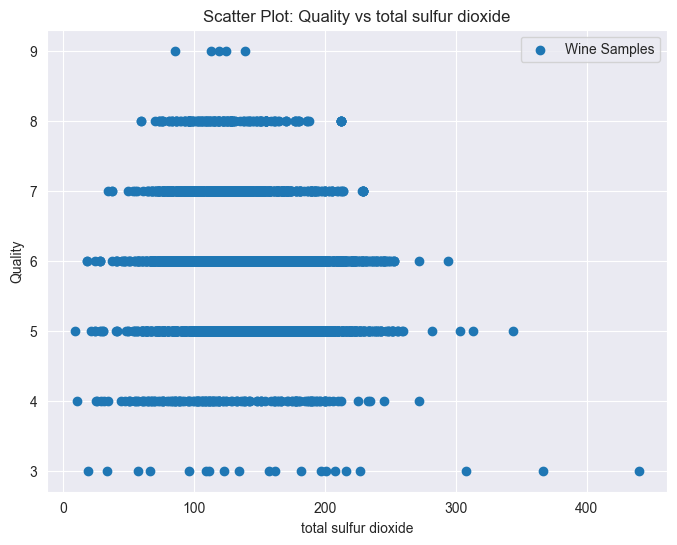

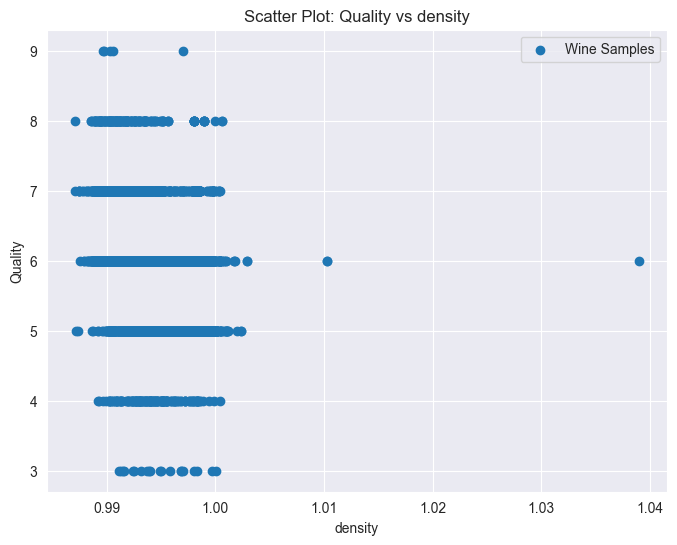

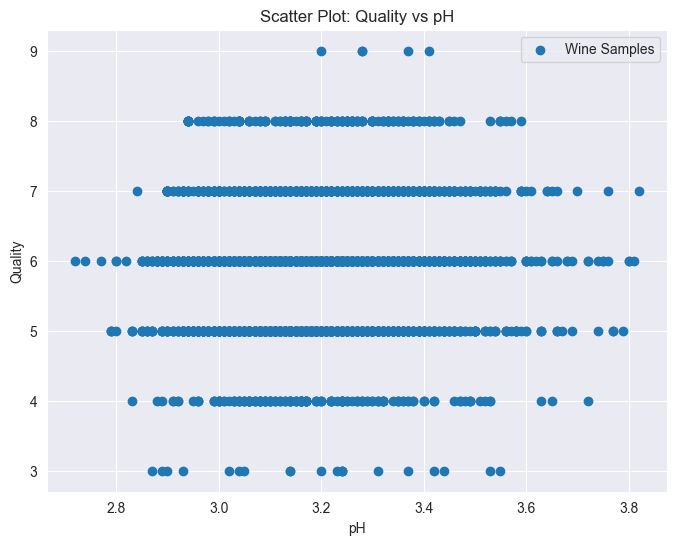

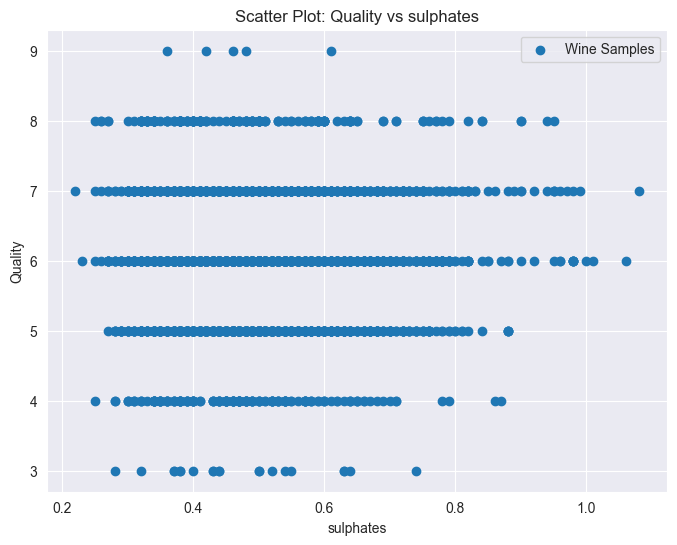

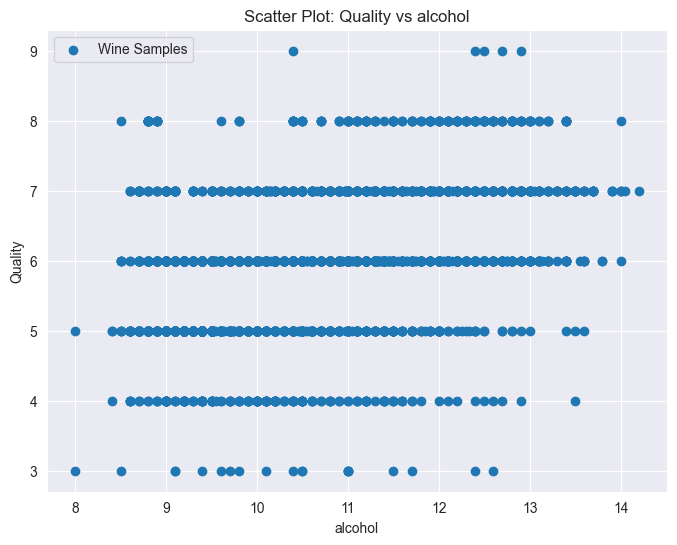

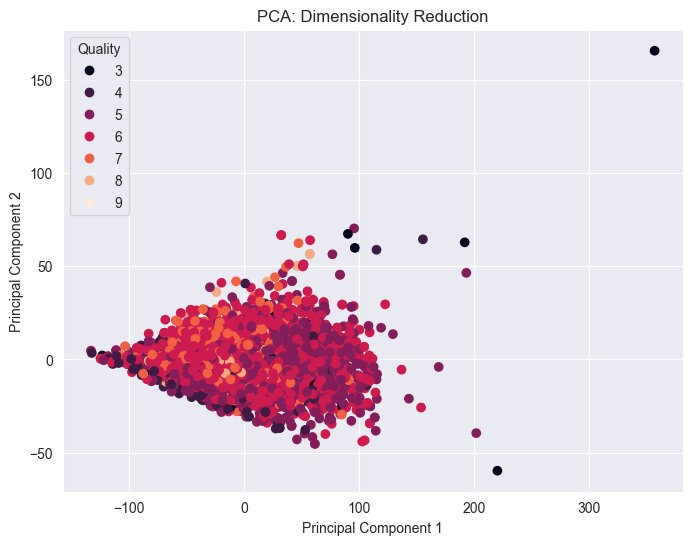

In [21]:
# Read the CSV file
data = pd.read_csv('winequality-white.csv', sep=';')

# Plotting a histogram for each attribute
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.suptitle('Histograms of Wine Dataset Attributes', y =1.05)
plt.show()

# Box plot for each attribute
data.plot(kind='box', figsize=(16, 8))
plt.tight_layout()
plt.title('Box Plots of Wine Dataset Attributes')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Wine Dataset Attributes')
plt.show()

# Scatter plots of attributes vs quality
for column in data.columns:
    if column != 'quality':
        plt.figure(figsize=(8, 6))
        plt.scatter(data[column], data['quality'])
        plt.xlabel(column)
        plt.ylabel('Quality')
        plt.title('Scatter Plot: Quality vs ' + column)
        plt.legend(['Wine Samples'])
        plt.show()


# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data.drop('quality', axis=1))  # Exclude 'quality' from PCA

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['quality'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Dimensionality Reduction')
plt.legend(*scatter.legend_elements(), title="Quality")
plt.show()



In [1]:
#Summary of statistics for each attribute
# Read the CSV file
data = pd.read_csv('winequality-white.csv', sep=';')

# Calculate summary statistics for the dataset
summary_stats = data.describe()

# Calculate IQR for each column and append to the summary
iqr = data.quantile(0.75) - data.quantile(0.25)
summary_stats.loc['IQR'] = iqr
summary_stats.to_csv('summary_stats.csv')
# Print the summary statistics
print(summary_stats)

NameError: name 'pd' is not defined

In [2]:
# Store the best scores and test scores for each model
best_scores = []
test_scores = []

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('winequality-white.csv', sep=';')

best_test_size = None
best_random_state = None
best_params = None
best_score = -1

X = data.drop('quality', axis=1)
y = data['quality']

# Iterate over a range of test sizes
for test_size in np.arange(0.2, 0.6, 0.1):

    # Iterate over a range of random states
    for random_state in range(1, 16):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        svm_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC())
        ])

        svm_param_grid = {
            'svm__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 10],
            'svm__kernel': ['linear', 'rbf', 'sigmoid'],
            'svm__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 10],
        }

        svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=4, n_jobs=-1)
        svm_grid_search.fit(X_train, y_train)

        if svm_grid_search.best_score_ > best_score:
            best_score = svm_grid_search.best_score_
            best_params = svm_grid_search.best_params_
            best_test_size = test_size
            best_random_state = random_state

        # Evaluate the best model on the test data
        best_model = svm_grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)

print("Best test size:", best_test_size)
print("Best random state:", best_random_state)
print("Best parameters found:", best_params)
print("Best cross-validated training data score found:", best_score)
print("Test dataset score:", test_score)


D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_sp

Best test size: 0.1
Best random state: 10
Best parameters found: {'svm__C': 4, 'svm__gamma': 0.7, 'svm__kernel': 'rbf'}
Best cross-validated training data score found: 0.654491833030853
Test dataset score: 0.6149448754593712


In [4]:
from sklearn.ensemble import GradientBoostingRegressor

best_test_size = None
best_random_state = None
best_params = None
best_score = -1

X = data.drop('quality', axis=1)
y = data['quality']

for test_size in np.arange(0.2, 0.6, 0.1):
    for random_state in range(1, 12):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        gbr_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('gbr', GradientBoostingRegressor())
        ])

        gbr_param_grid = {
            'gbr__n_estimators': [100, 200, 300, 400, 500],
            'gbr__learning_rate': [0.01, 0.1, 0.2, 0.3],
            'gbr__max_depth': [3, 4, 5, 6, 7],
        }

        gbr_grid_search = GridSearchCV(gbr_pipeline, gbr_param_grid, cv=4, n_jobs=-1)
        gbr_grid_search.fit(X_train, y_train)

        if gbr_grid_search.best_score_ > best_score:
            best_score = gbr_grid_search.best_score_
            best_params = gbr_grid_search.best_params_
            best_test_size = test_size
            best_random_state = random_state

        best_model = gbr_grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)

print("Best test size:", best_test_size)
print("Best random state:", best_random_state)
print("Best parameters found:", best_params)
print("Best cross-validated training data score found:", best_score)
print("Test dataset score:", test_score)

Best test size: 0.1
Best random state: 12
Best parameters found: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 6, 'gbr__n_estimators': 500}
Best cross-validated training data score found: 0.4997075536094106
Test dataset score: 0.422993254223743


In [ ]:
from sklearn.ensemble import RandomForestRegressor

best_test_size = None
best_random_state = None
best_params = None
best_score = -1

X = data.drop('quality', axis=1)
y = data['quality']

for test_size in np.arange(0.1, 0.6, 0.1):
    for random_state in range(1, 21):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        rf_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestRegressor())
        ])

        rf_param_grid = {
            'rf__n_estimators': [100, 200, 300, 400, 500],
            'rf__max_depth': [None, 10, 20, 30, 40, 50],
            'rf__min_samples_split': [2, 5, 10],
            'rf__min_samples_leaf': [1, 2, 4],
        }

        rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=4, n_jobs=-1)
        rf_grid_search.fit(X_train, y_train)

        if rf_grid_search.best_score_ > best_score:
            best_score = rf_grid_search.best_score_
            best_params = rf_grid_search.best_params_
            best_test_size = test_size
            best_random_state = random_state

        best_model = rf_grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)

print("Best test size:", best_test_size)
print("Best random state:", best_random_state)
print("Best parameters found:", best_params)
print("Best cross-validated training data score found:", best_score)
print("Test dataset score:", test_score)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
data = pd.read_csv('winequality-white.csv', sep=';')

best_test_size = None
best_random_state = None
best_params = None
best_score = -1

X = data.drop('quality', axis=1)
y = data['quality']
for test_size in np.arange(0.1, 0.6, 0.1):
    for random_state in range(1, 21):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        knn_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier())
        ])
        knn_param_grid = {
            'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
            'knn__weights': ['uniform', 'distance'],
            'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'knn__leaf_size': [10, 20, 30, 40, 50],
            'knn__p': [1, 2, 3, 4, 5],
        }
        knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=4, n_jobs=-1)
        knn_grid_search.fit(X_train, y_train)
        if knn_grid_search.best_score_ > best_score:
            best_score = knn_grid_search.best_score_
            best_params = knn_grid_search.best_params_
            best_test_size = test_size
            best_random_state = random_state
        best_model = knn_grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)
print("Best test size:", best_test_size)
print("Best random state:", best_random_state)
print("Best parameters found:", best_params)
print("Best cross-validated training data score found:", best_score)
print("Test dataset score:", test_score)